Data Loading ..  

In [1]:
# uploaded dataset in Google Drive , Extracting  It from Drive itself
file_id  = '1413zOs5hhtH7O6CUqMTl-jqtNs2H3l55'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# importing  pandas for data manipulation
import pandas as pd
data = pd.read_csv(download_url, encoding='latin-1')

#data display  for first five rows

data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Data cleaning .



In [2]:
#shape of dataset
display(data.shape)
print( '----------------------------------------\n')
#Data types  & null checks
display(data.info())
print( '----------------------------------------\n')
#statistics summary like mean, mode, std .. etc
display(data.describe())
print( '----------------------------------------\n')

(1000, 9)

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


None

----------------------------------------



,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


----------------------------------------



From above Observation, There is No Null spaces in Dataset and All Numeric columns like Age, Quantity,Price Per Unit and Total Amount ...  are appropriate with integer Datatype

and  remaining are object which was same were seen in dataset


Except Date column which was in object type but we should convert it  into Date-Time Format


In [3]:
#convert into data-time format
data['Date'] = pd.to_datetime(data['Date'])

display(data['Date'])
#datatype converted


,Date
0,2023-11-24
1,2023-02-27
2,2023-01-13
3,2023-05-21
4,2023-05-06
...,...
995,2023-05-16
996,2023-11-17
997,2023-10-29
998,2023-12-05


In [4]:
#drop  duplicates
data.drop_duplicates(inplace=True)
#again check for datashape if  changes it indicates that duplicates were dropped if not it indicates there were no duplicates
data.shape


(1000, 9)

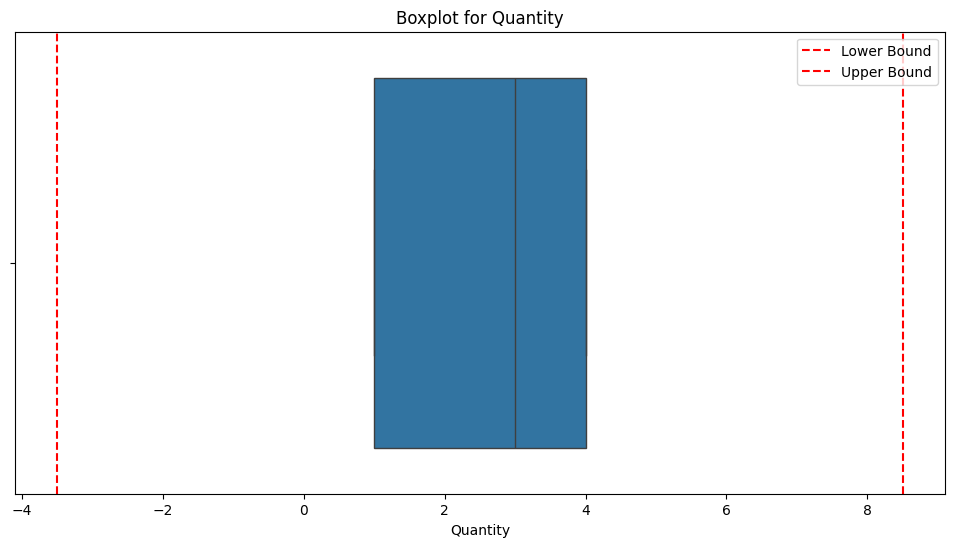

Column : Quantity
Lower Bound:-3.5, Upper Bound : 8.5
Number of Outliers : 0


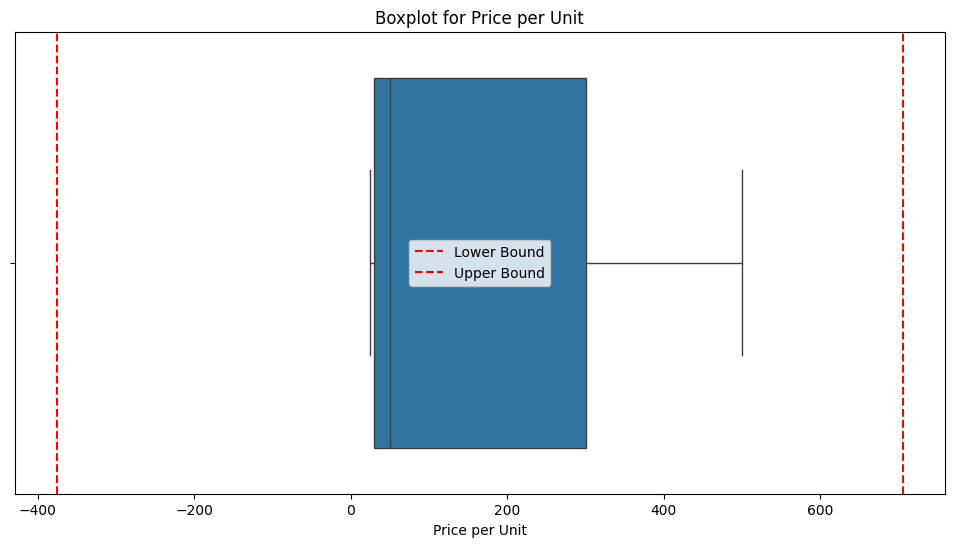

Column : Price per Unit
Lower Bound:-375.0, Upper Bound : 705.0
Number of Outliers : 0


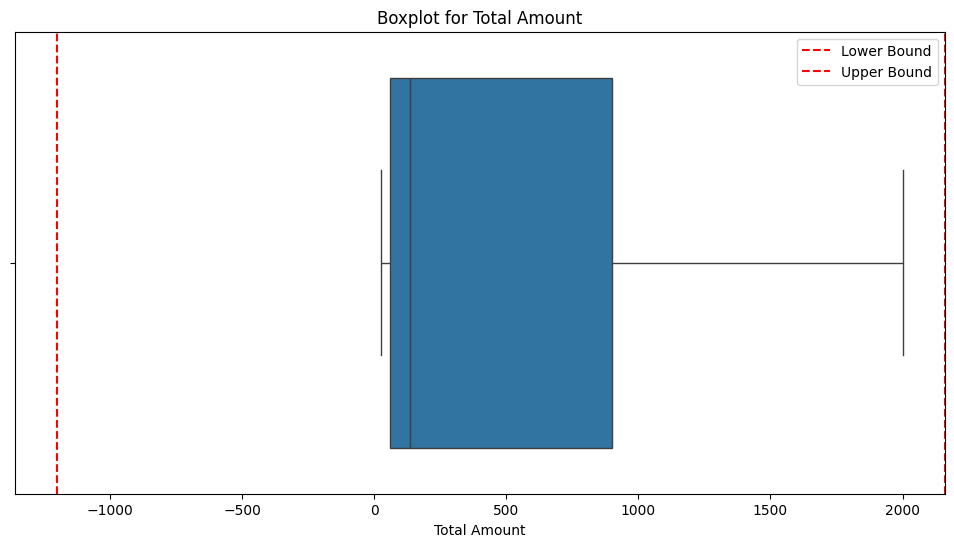

Column : Total Amount
Lower Bound:-1200.0, Upper Bound : 2160.0
Number of Outliers : 0


In [5]:
# no Duplicates
# outlier check  in numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
#defining function detect outliers for numeric columns using IQR method and Boxplot for visualization
def outliers_display(data,cols= None,figsize=(12,6)):
  if cols is None:
    cols = data.select_dtypes(include='number').columns.tolist()
  for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    # create a boxplot

    plt.figure(figsize=figsize)
    sns.boxplot(x=data[col])
    #boundary lines for reference
    plt.axvline(x=lb, color='r', linestyle='--',label='Lower Bound')
    plt.axvline(x=ub, color='r', linestyle='--',label='Upper Bound')
    plt.title(f'Boxplot for {col}')
    plt.legend()
    plt.show()


    outliers = data[(data[col] < lb) | (data[col] > ub)]
    print(f"Column : {col}")
    print(f"Lower Bound:{lb}, Upper Bound : {ub}")
    print(f"Number of Outliers : {len(outliers)}")
num_cols = ["Quantity","Price per Unit" , "Total Amount"]
outliers_display(data,num_cols)


In [6]:
# no  outliers all observations are in range  so no need to handle it
# creating additional features for time series analysis for better accuracy in predicting
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['DayName'] = data['Date'].dt.day_name()
data['Quarter'] = data['Date'].dt.quarter



data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day,DayOfWeek,DayName,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24,4,Friday,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,0,Monday,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13,4,Friday,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21,6,Sunday,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6,5,Saturday,2


Descriptive Statistics


In [7]:
#for numeric datatype columns
cols = ['Age','Quantity','Price per Unit','Total Amount']
stats_data = pd.DataFrame({
    'Mean': data[cols].mean(),
    'Median': data[cols].median(),
    'Mode': data[cols].mode().iloc[0],
    'Standard Deviation': data[cols].std(),
    'Minimum': data[cols].min(),
    'Maximum': data[cols].max(),
    'Range': data[cols].max() - data[cols].min(),
    'Variance': data[cols].var(),
    'Skewness': data[cols].skew(),
    'Kurtosis': data[cols].kurtosis()
})
display(stats_data)

# handling categorical values
category_data = ['Gender','Product Category']
for col in category_data:
  display(data[col].value_counts(normalize=True) * 100)


,Mean,Median,Mode,Standard Deviation,Minimum,Maximum,Range,Variance,Skewness,Kurtosis
Age,41.392,42.0,43.0,13.681430,18,64,46,187.181518,-0.048812,-1.201212
Quantity,2.514,3.0,4.0,1.132734,1,4,3,1.283087,-0.014036,-1.392867
Price per Unit,179.890,50.0,50.0,189.681356,25,500,475,35979.016917,0.736308,-1.138996
Total Amount,456.000,135.0,50.0,559.997632,25,2000,1975,313597.347347,1.376128,0.815031


,proportion
Gender,
Female,51.0
Male,49.0


,proportion
Product Category,
Clothing,35.1
Electronics,34.2
Beauty,30.7


Time Series Analysis :

<ipython-input-8-452d2d657165>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Total Amount'].resample('M').sum()


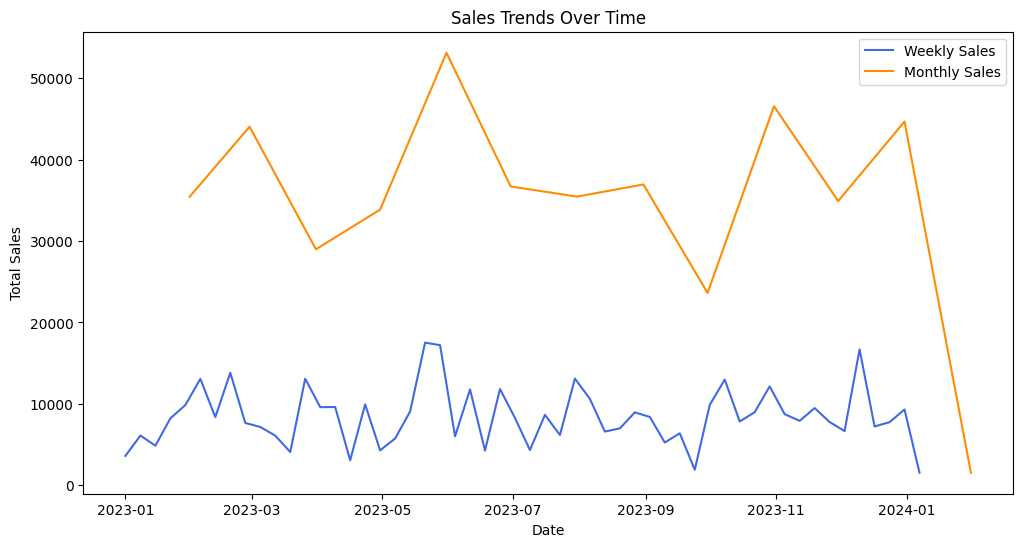

In [8]:
#resampl(e the data to weekly and monthly freq
data.set_index('Date',inplace=True)
weekly_data = data['Total Amount'].resample('W').sum()
monthly_data = data['Total Amount'].resample('M').sum()

#plotting  sales Trends
plt.figure(figsize=(12,6))
plt.plot(weekly_data,label='Weekly Sales',color= 'royalblue')
plt.plot(monthly_data,label='Monthly Sales',color='darkorange')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


series decomposition:


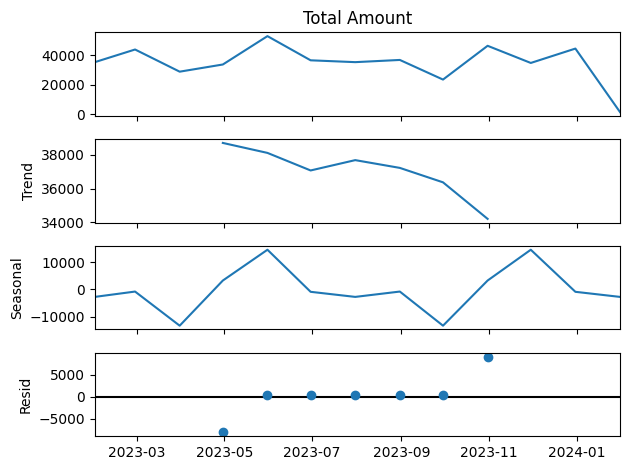

In [9]:
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(monthly_data,model='additive',period=6)
decom.plot()
plt.tight_layout()
plt.show()

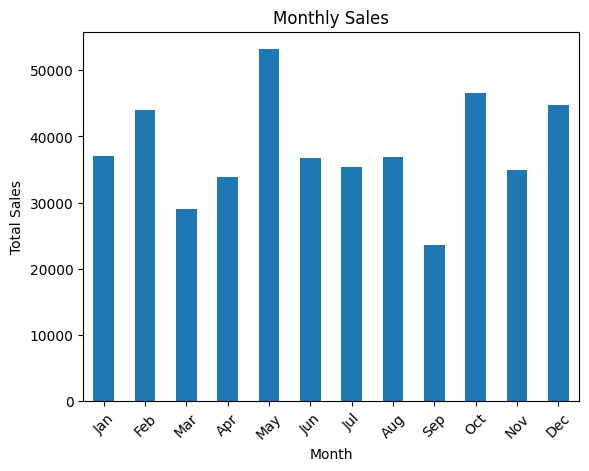

In [10]:
#seasonality by month

from dateutil.relativedelta import relativedelta
from datetime import datetime

monthly_stats = data.groupby('Month')['Total Amount'].sum()

monthly_stats_index = monthly_stats.index.map(lambda x : (datetime(2000, x, 1)).strftime('%b'))
ax = monthly_stats.plot(kind='bar')
ax.set_xticks(range(len(monthly_stats)))
ax.set_xticklabels(monthly_stats_index,rotation = 45 , ha ="center" )

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()

week analysis :

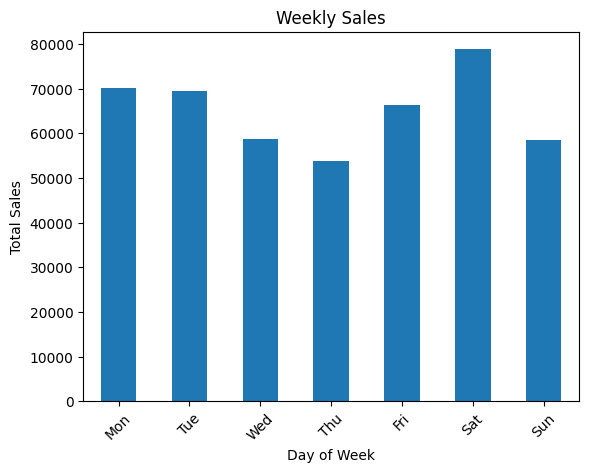

In [11]:
dOfweek_stats = data.groupby('DayOfWeek')['Total Amount'].sum()
dOfweek_stats_index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = dOfweek_stats.plot(kind='bar')
ax.set_xticks(range(len(dOfweek_stats)))
ax.set_xticklabels(dOfweek_stats_index,rotation = 45 , ha ="center" )

plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Weekly Sales')
plt.show()


Heatmap for weekly and monthly analysis :

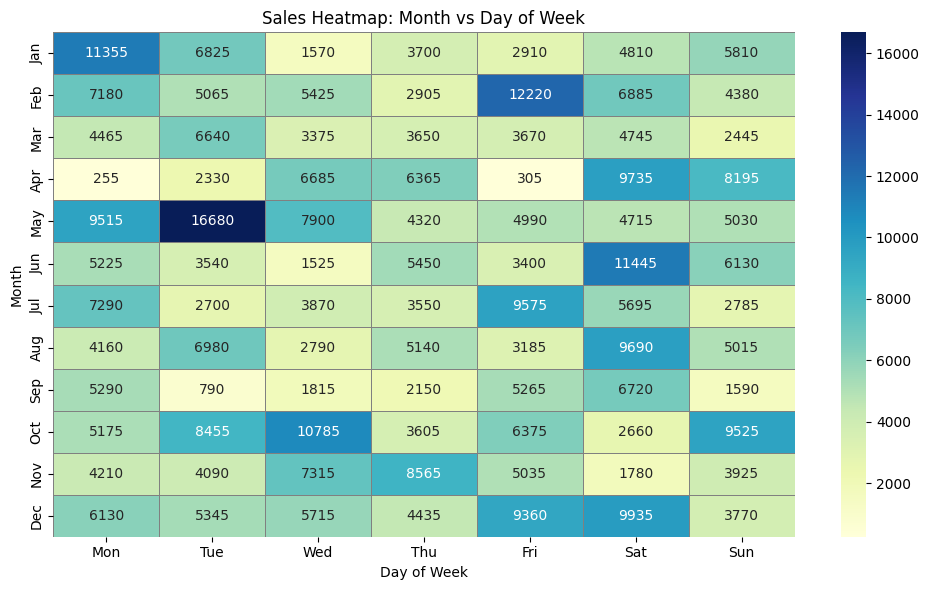

In [12]:
# Create a pivot table: rows = Month, columns = Day of Week, values = total sales
heatmap_data = data.pivot_table(
    index='Month',
    columns='DayOfWeek',
    values='Total Amount',
    aggfunc='sum'
)
#setting months as rows and daysOfweek in columns
heatmap_data.index = [monthly_stats_index[m-1] for m in heatmap_data.index]
heatmap_data.columns = dOfweek_stats_index

#now plotting
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Sales Heatmap: Month vs Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

customer-product analysis :

<ipython-input-13-6204f2ffbf80>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = data.groupby(['Age_Group', 'Gender']).agg({


Total Amount                Quantity
                        count    sum    mean     mean
Age_Group Gender                                     
18-24     Female           72  35920  498.89     2.43
          Male             77  38730  502.99     2.48
25-34     Female          102  51850  508.33     2.62
          Male            101  45240  447.92     2.52
35-44     Female          112  52965  472.90     2.60
          Male             95  43870  461.79     2.55
45-54     Female          115  46825  407.17     2.61
          Male            110  50410  458.27     2.53
55-64     Female          109  45280  415.41     2.43
          Male            107  44910  419.72     2.34
65+       Female            0      0     NaN      NaN
          Male              0      0     NaN      NaN

<ipython-input-13-6204f2ffbf80>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['Age_Group', 'Gender']).agg({


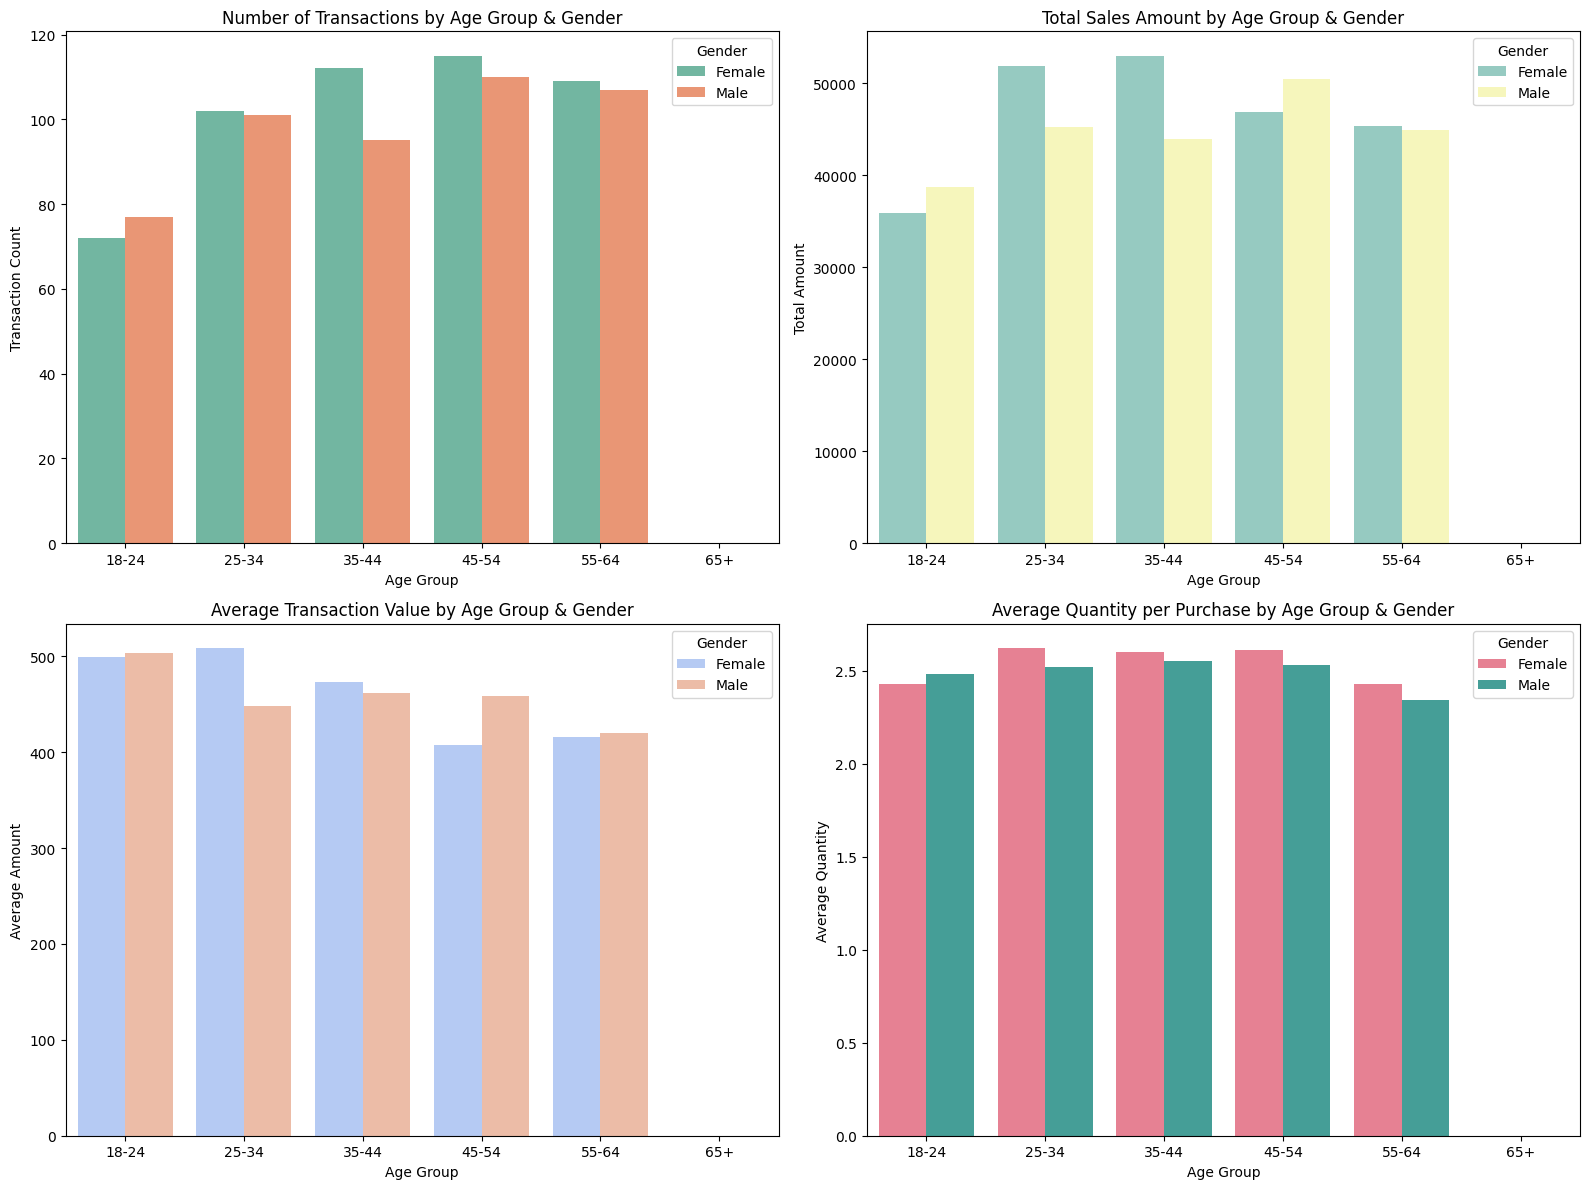

In [13]:
# Customer age analysis
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_analysis = data.groupby(['Age_Group', 'Gender']).agg({
    'Total Amount': ['count', 'sum', 'mean'],
    'Quantity': 'mean'
}).round(2)

display(age_group_analysis)


#for plotting
plot_data = data.groupby(['Age_Group', 'Gender']).agg({
    'Total Amount': ['count', 'sum', 'mean'],
    'Quantity': 'mean'
}).round(2).reset_index()

# Flatten multi-level column names
plot_data.columns = ['Age_Group', 'Gender', 'Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Avg_Quantity']

# --- Visualization ---

plt.figure(figsize=(16, 12))

# 1. Transaction Count by Age Group & Gender
plt.subplot(2, 2, 1)
sns.barplot(data=plot_data, x='Age_Group', y='Transaction_Count', hue='Gender', palette='Set2')
plt.title('Number of Transactions by Age Group & Gender')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')

# 2. Total Amount Spent
plt.subplot(2, 2, 2)
sns.barplot(data=plot_data, x='Age_Group', y='Total_Amount', hue='Gender', palette='Set3')
plt.title('Total Sales Amount by Age Group & Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')

# 3. Average Purchase Amount
plt.subplot(2, 2, 3)
sns.barplot(data=plot_data, x='Age_Group', y='Avg_Amount', hue='Gender', palette='coolwarm')
plt.title('Average Transaction Value by Age Group & Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Amount')

# 4. Average Quantity
plt.subplot(2, 2, 4)
sns.barplot(data=plot_data, x='Age_Group', y='Avg_Quantity', hue='Gender', palette='husl')
plt.title('Average Quantity per Purchase by Age Group & Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Quantity')

plt.tight_layout()
plt.show()


Total Amount                    Quantity Price per Unit
                          sum        mean count      mean           mean
Product Category                                                        
Electronics            156905  458.786550   342  2.482456     181.900585
Clothing               155580  443.247863   351  2.547009     174.287749
Beauty                 143515  467.475570   307  2.511401     184.055375

<ipython-input-14-ebe3f30648e9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_analysis.index, y=product_analysis[('Total Amount', 'sum')], palette='viridis')


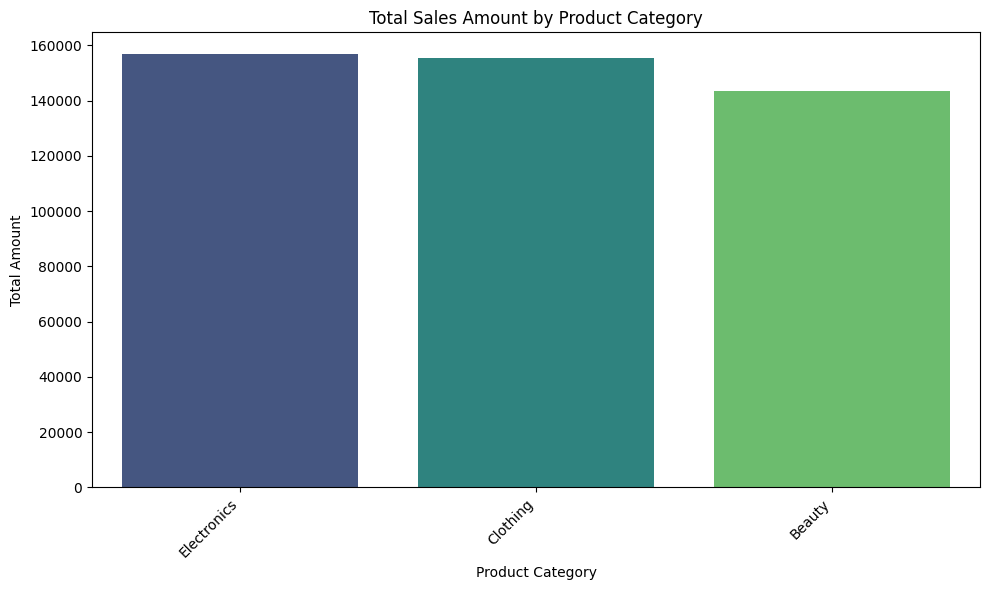

<ipython-input-14-ebe3f30648e9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_analysis.index, y=product_analysis['Quantity','mean'], palette='magma')


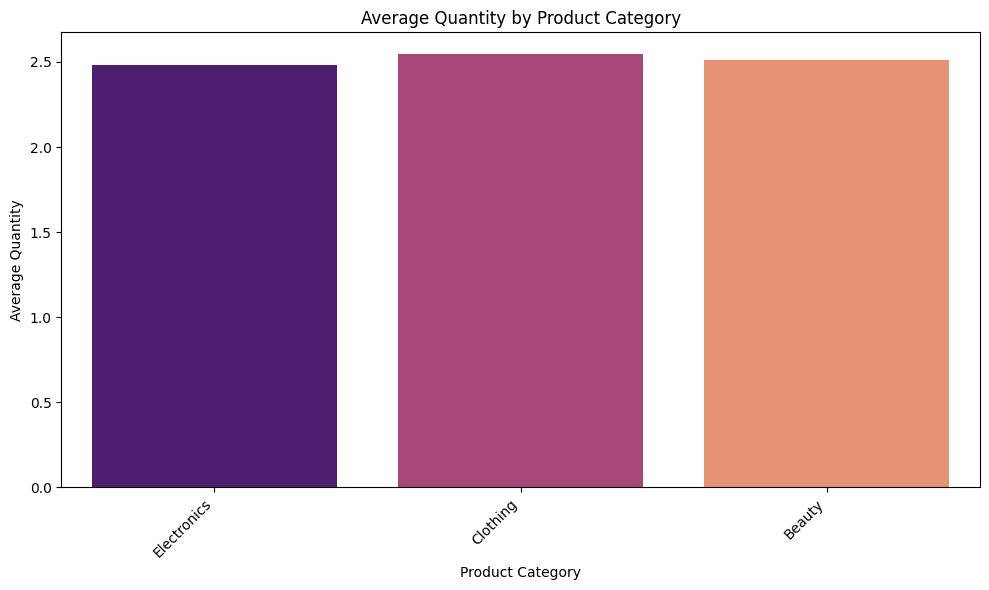

<ipython-input-14-ebe3f30648e9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_analysis.index, y=product_analysis['Price per Unit','mean'], palette='cividis')


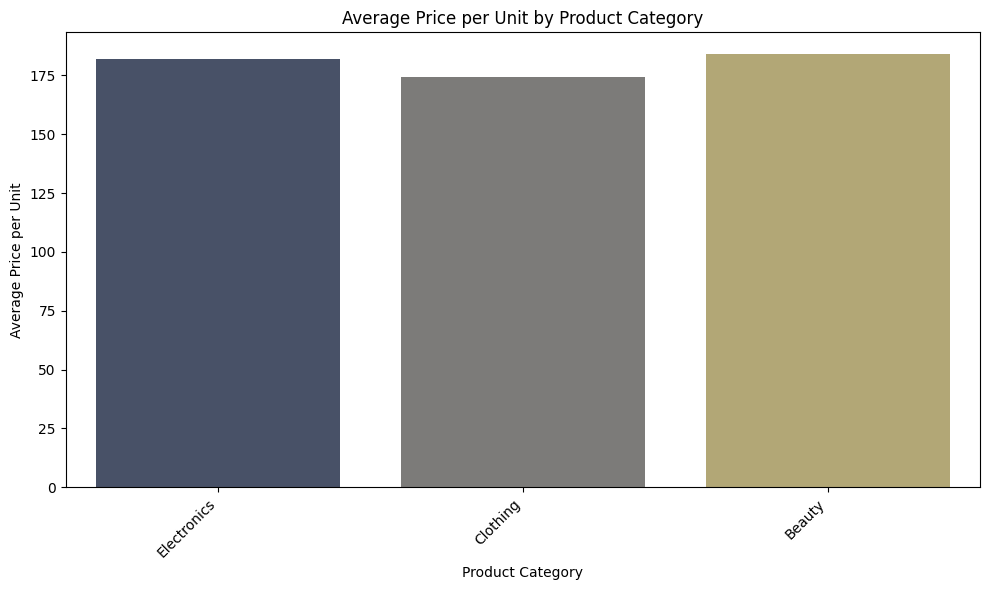

In [14]:
# Product category performance
product_analysis = data.groupby('Product Category').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Quantity': 'mean',
    'Price per Unit': 'mean'
}).sort_values(('Total Amount', 'sum'), ascending=False)
display(product_analysis)


#for plotting or visualization :
# Plotting Total Amount by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_analysis.index, y=product_analysis[('Total Amount', 'sum')], palette='viridis')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the mean Quantity by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_analysis.index, y=product_analysis['Quantity','mean'], palette='magma')
plt.title('Average Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the mean Price per Unit by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_analysis.index, y=product_analysis['Price per Unit','mean'], palette='cividis')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

RFM ANALYSIS:  for customer segmentation analysis ...


In [15]:
data.head()
# here date is in index so to convert  index into column :
data = data.copy()
data['Date'] = data.index

In [16]:
# RFM Analysis (Recency, Frequency, Monetary)
current_date = data['Date'].max() + pd.Timedelta(days=1)
rfm = data.groupby('Customer ID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Transaction ID': 'nunique',
    'Total Amount': 'sum'
})

rfm.rename(columns={
    'Date': 'Recency',
    'Transaction ID': 'Frequency',
    'Total Amount': 'MonetaryValue'
}, inplace=True)

# RFM scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5],duplicates='drop')

rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

print("\n Top customers based on RFM scores")
display(rfm.sort_values('RFM_Score', ascending=False).head(10))



 Top customers based on RFM scores


,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
CUST805,4,1,1500,5,5,5,15
CUST869,69,1,1500,5,5,5,15
CUST908,4,1,1200,5,5,5,15
CUST828,24,1,1200,5,5,5,15
CUST950,56,1,900,5,5,4,14
CUST700,24,1,2000,5,4,5,14
CUST832,113,1,2000,4,5,5,14
CUST608,31,1,1500,5,4,5,14
CUST939,15,1,300,5,5,4,14


visualization part:

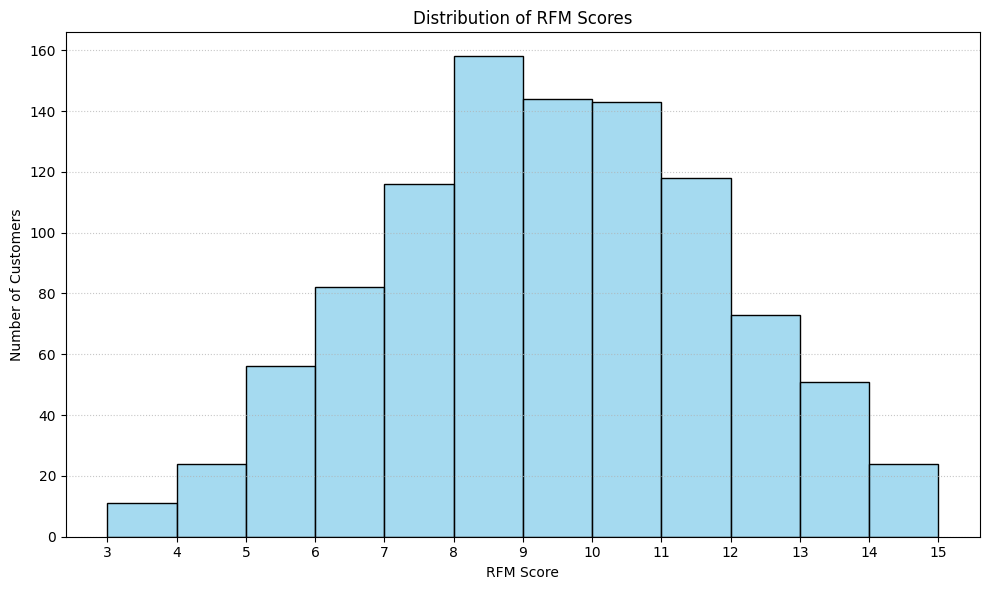

<ipython-input-17-af4527ab62e2>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_heatmap = rfm.pivot_table(


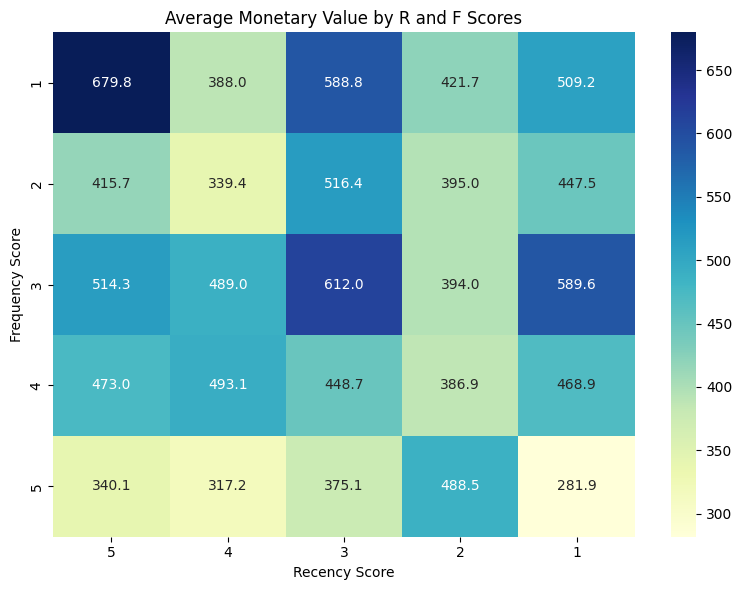

<ipython-input-17-af4527ab62e2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm, palette='Set2', order=['Low Value', 'Mid Value', 'High Value', 'Top Customers'])


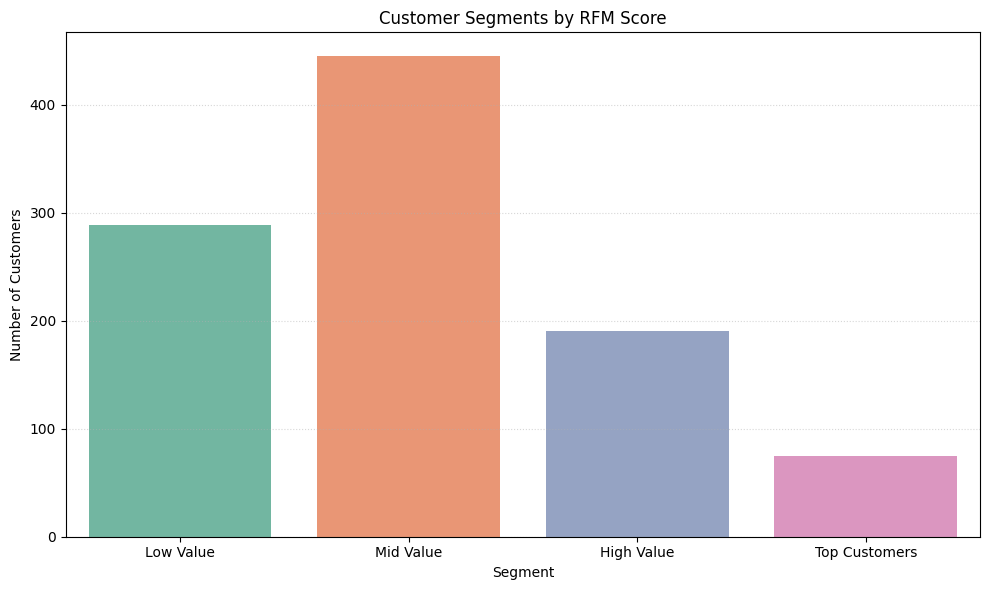

In [17]:
# 1. Distribution of RFM Scores
plt.figure(figsize=(10, 6))
sns.histplot(rfm['RFM_Score'], bins=range(3, 16), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(range(3, 16))
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Heatmap of average MonetaryValue by R and F scores
rfm_heatmap = rfm.pivot_table(
    index='F_Score', columns='R_Score', values='MonetaryValue', aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Monetary Value by R and F Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.tight_layout()
plt.show()

# 3. RFM segments: highlight best customers
rfm['Segment'] = pd.cut(
    rfm['RFM_Score'],
    bins=[2, 7, 10, 12, 15],
    labels=['Low Value', 'Mid Value', 'High Value', 'Top Customers']
)

plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm, palette='Set2', order=['Low Value', 'Mid Value', 'High Value', 'Top Customers'])
plt.title('Customer Segments by RFM Score')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Simple English recommendations in a conversational style
data = {
    "Area": [
        "Who to Target",
        "Who to Target",
        "What to Sell",
        "What to Sell",
        "Pricing & Deals",
        "Pricing & Deals",
        "Pricing & Deals",
        "Customer Relationships",
        "Customer Relationships",
        "Customer Relationships",
        "Stock Planning",
        "Stock Planning",
        "Where to Sell",
        "Where to Sell",
        "Future Ideas",
        "Future Ideas",
        "Future Ideas"
    ],

    "Action": [
        "Run different ads for men (tech) and women (beauty)",
        "Create age-specific offers (young=trendy, older=practical)",
        "Push best-selling products harder",
        "Fix slow-selling items with discounts/bundles",
        "Offer 'buy more, save more' combos",
        "Have budget & premium price options",
        "Time big promotions with holidays",
        "Recommend products based on past buys",
        "Start a rewards program for regulars",
        "Ask customers what they like/dislike",
        "Use sales history to predict stock needs",
        "Watch for hot new trends early",
        "Keep online/offline experience smooth",
        "Boost social media & email marketing",
        "Track customer habits better",
        "Try automated marketing tools",
        "Add eco-friendly products/ads"
    ],

    "Expected Benefit": [
        "Better response from each gender",
        "More sales across age groups",
        "Make more from what already works",
        "Turn weak products into winners",
        "Customers buy more per order",
        "Attract both cheap & fancy shoppers",
        "Bigger holiday season sales",
        "Customers feel understood",
        "People come back more often",
        "Learn how to improve",
        "Right stock = no waste or shortages",
        "Beat competitors to new trends",
        "Happy customers everywhere",
        "Reach more people online",
        "Smarter ads = better results",
        "Save time, get clever ideas",
        "Appeal to green-minded buyers"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print in clean format
print(df.to_string(index=False))

                  Area                                                     Action                    Expected Benefit
         Who to Target        Run different ads for men (tech) and women (beauty)    Better response from each gender
         Who to Target Create age-specific offers (young=trendy, older=practical)        More sales across age groups
          What to Sell                          Push best-selling products harder   Make more from what already works
          What to Sell              Fix slow-selling items with discounts/bundles     Turn weak products into winners
       Pricing & Deals                         Offer 'buy more, save more' combos        Customers buy more per order
       Pricing & Deals                        Have budget & premium price options Attract both cheap & fancy shoppers
       Pricing & Deals                          Time big promotions with holidays         Bigger holiday season sales
Customer Relationships                      Recommend pr